In [1]:
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.layout import planar_layout
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

## Graph concepts

### elements

- graph
- vertex
- edge
- path

### graph properties

- directed or undirected
- weighted or unweighted
- cyclic or acyclic
- single or multiple edges
- connected or disconnected

### vertex properties

- in-degree
- out-degree
- centrality

### edge properties

- direction
- weight
- multiplicity




### Graph representations

- Vertex and edge collections
- Adjacency list
- Adjacency matrix
- Sparse matrix

In [2]:
%matplotlib inline
import networkx as nx
from pprint import pprint

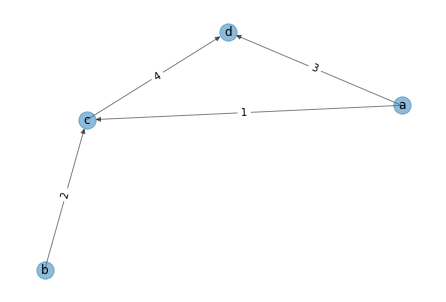

In [3]:
vs = ['a', 'b', 'c', 'd']
es = [('a','c', 1), ('b','c', 2), ('a','d', 3), ('c', 'd', 4)]

g1 = nx.DiGraph()
g1.add_nodes_from(vs)
g1.add_weighted_edges_from(es)

pos = nx.spring_layout(g1)
labels = nx.get_edge_attributes(g1,'weight')
nx.draw(g1, pos=pos, alpha=0.5)
nx.draw_networkx_edge_labels(g1, pos=pos, edge_labels=labels)
nx.draw_networkx_labels(g1, pos=pos)
pass

In [4]:
import sys

In [5]:
nx.write_adjlist(g1, sys.stdout)

#/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/jovyan/.local/share/jupyter/runtime/kernel-371202d8-790e-40fc-a4e1-47e49a8519d5.json
# GMT Wed Sep 29 21:20:30 2021
# 
a c d
b c
c d
d


In [6]:
print(nx.adj_matrix(g1))

  (0, 2)	1
  (0, 3)	3
  (1, 2)	2
  (2, 3)	4


In [7]:
nx.adj_matrix(g1).todense()

matrix([[0, 0, 1, 3],
        [0, 0, 2, 0],
        [0, 0, 0, 4],
        [0, 0, 0, 0]])

In [8]:
#### Standard format for graph exchange is GraphML

In [9]:
nx.write_gml(g1, sys.stdout)

graph [
  directed 1
  node [
    id 0
    label "a"
  ]
  node [
    id 1
    label "b"
  ]
  node [
    id 2
    label "c"
  ]
  node [
    id 3
    label "d"
  ]
  edge [
    source 0
    target 2
    weight 1
  ]
  edge [
    source 0
    target 3
    weight 3
  ]
  edge [
    source 1
    target 2
    weight 2
  ]
  edge [
    source 2
    target 3
    weight 4
  ]
]


### Some examples

In [10]:
n = 50
k = 6
p =0.3
g = nx.watts_strogatz_graph(n, k, p)

### Visual representations of the same graph may look very different

#### Complete graph

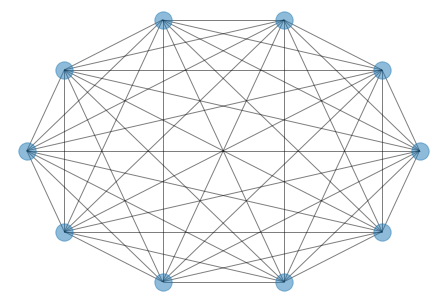

In [11]:
nx.draw_circular(nx.complete_graph(10), alpha=0.5)

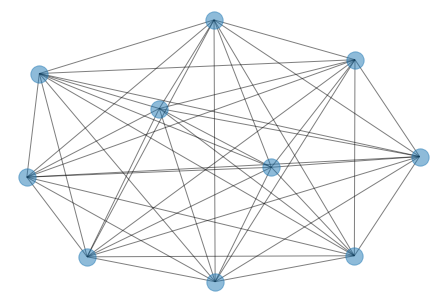

In [12]:
nx.draw(nx.complete_graph(10), alpha=0.5)

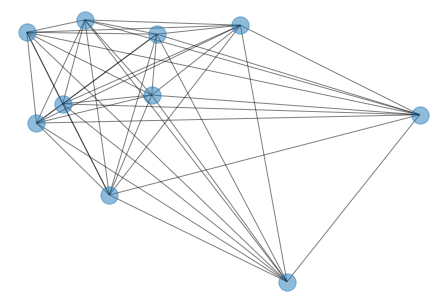

In [13]:
nx.draw_random(nx.complete_graph(10), alpha=0.5)

#### Undirected graph

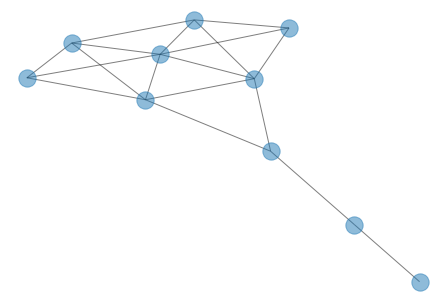

In [14]:
nx.draw(nx.krackhardt_kite_graph(), alpha=0.5)

#### Directed graph

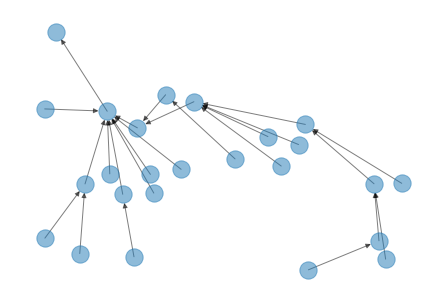

In [15]:
nx.draw(nx.gn_graph(25), alpha=0.5)

## Graph Algorithms

In [16]:
! python3 -m pip install --quiet pydot python-louvain

### Search

In [17]:
g = {
    1: [2,3,4],
    2: [5,6],
    3: [],
    4: [7,8],
    5: [9,10],
    6: [],
    7: [11, 12],
    8: [],
    9: [],
    10: [],
    11: [],
    12: []
}

In [18]:
G = nx.from_dict_of_lists(g)

In [19]:
pos = graphviz_layout(G, prog='dot')

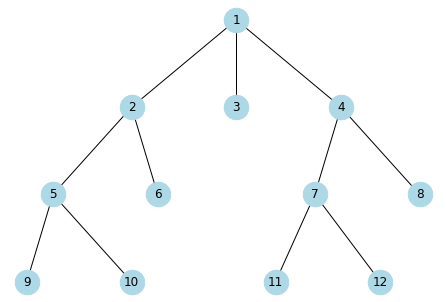

In [20]:
nx.draw(G, pos, with_labels=True, node_size=600, node_color='lightblue')

#### Depth first search

In [21]:
list(nx.dfs_tree(G, 1))

[1, 2, 5, 9, 10, 6, 3, 4, 7, 11, 12, 8]

#### Breadth first search

In [22]:
list(nx.bfs_tree(G, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Pathfinding

In [23]:
edges = [
    ('A', 'B', 8),
    ('A', 'C', 5),
    ('A', 'D', 1),
    ('B', 'C', 6),
    ('C', 'D', 3),
    ('C', 'E', 2),
    ('D', 'E', 4)
]

In [24]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

/opt/conda/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


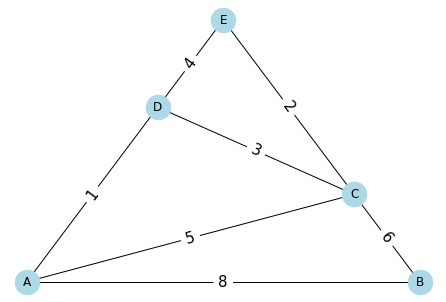

In [25]:
pos = planar_layout(G)
nx.draw(G, 
        pos, 
        with_labels=True,
        node_size=600, 
        node_color='lightblue')
labels = nx.draw_networkx_edge_labels(
    G, 
    pos, 
    edge_labels={(x[0], x[1]): str(x[2]) for x in edges},
    font_size=15,
)

#### Shortest  path

In [26]:
nx.dijkstra_path(G, 'A', 'C')

['A', 'D', 'C']

#### Single source shortest path

In [27]:
list(nx.single_source_dijkstra(G, 'A'))

[{'A': 0, 'D': 1, 'C': 4, 'E': 5, 'B': 8},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'D', 'C'],
  'D': ['A', 'D'],
  'E': ['A', 'D', 'E']}]

#### All pairs shortest path

In [28]:
list(nx.all_pairs_dijkstra_path(G))

[('A',
  {'A': ['A'],
   'B': ['A', 'B'],
   'C': ['A', 'D', 'C'],
   'D': ['A', 'D'],
   'E': ['A', 'D', 'E']}),
 ('B',
  {'B': ['B'],
   'A': ['B', 'A'],
   'C': ['B', 'C'],
   'D': ['B', 'C', 'D'],
   'E': ['B', 'C', 'E']}),
 ('C',
  {'C': ['C'],
   'A': ['C', 'D', 'A'],
   'B': ['C', 'B'],
   'D': ['C', 'D'],
   'E': ['C', 'E']}),
 ('D',
  {'D': ['D'],
   'A': ['D', 'A'],
   'C': ['D', 'C'],
   'E': ['D', 'E'],
   'B': ['D', 'A', 'B']}),
 ('E',
  {'E': ['E'],
   'C': ['E', 'C'],
   'D': ['E', 'D'],
   'A': ['E', 'D', 'A'],
   'B': ['E', 'C', 'B']})]

### Minimal spanning tree

In [29]:
G_min = nx.minimum_spanning_tree(G)

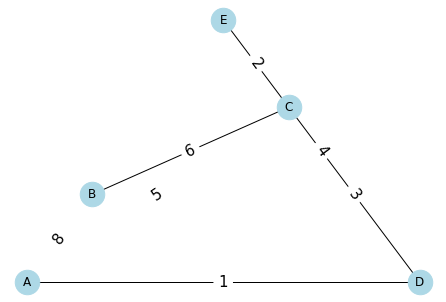

In [30]:
pos = planar_layout(G_min)
nx.draw(G_min, 
        pos, 
        with_labels=True,
        node_size=600, 
        node_color='lightblue')
labels = nx.draw_networkx_edge_labels(
    G_min, 
    pos, 
    edge_labels={(x[0], x[1]): str(x[2]) for x in edges},
    font_size=15,
)

### Centrality

In [31]:
G = nx.karate_club_graph()

In [32]:
pos = nx.kamada_kawai_layout(G)

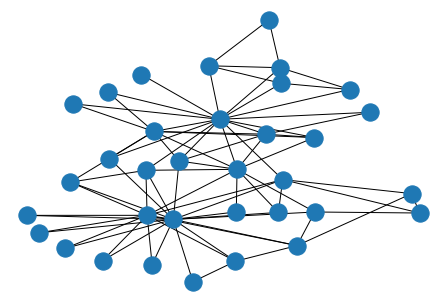

In [33]:
nx.draw(G, pos)

In [34]:
plt.viridis()

<Figure size 432x288 with 0 Axes>

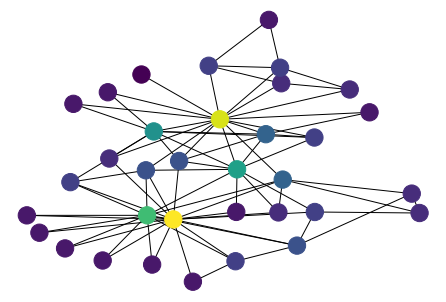

In [35]:
values = nx.degree(G)
n_color = np.asarray([values(n) for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

In [36]:
help(nx.closeness_centrality)

Help on function closeness_centrality in module networkx.algorithms.centrality.closeness:

closeness_centrality(G, u=None, distance=None, wf_improved=True)
    Compute closeness centrality for nodes.
    
    Closeness centrality [1]_ of a node `u` is the reciprocal of the
    average shortest path distance to `u` over all `n-1` reachable nodes.
    
    .. math::
    
        C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},
    
    where `d(v, u)` is the shortest-path distance between `v` and `u`,
    and `n` is the number of nodes that can reach `u`. Notice that the
    closeness distance function computes the incoming distance to `u`
    for directed graphs. To use outward distance, act on `G.reverse()`.
    
    Notice that higher values of closeness indicate higher centrality.
    
    Wasserman and Faust propose an improved formula for graphs with
    more than one connected component. The result is "a ratio of the
    fraction of actors in the group who are reachable, to the aver

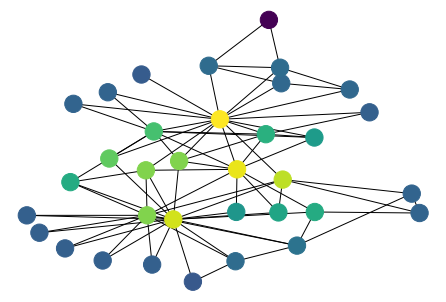

In [37]:
values = nx.closeness_centrality(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

In [38]:
help(nx.pagerank)

Help on function pagerank in module networkx.algorithms.link_analysis.pagerank_alg:

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
    Returns the PageRank of the nodes in the graph.
    
    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.
    
    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.
    
    alpha : float, optional
      Damping parameter for PageRank, default=0.85.
    
    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key some subset of graph nodes and personalization value each of those.
      At least one personalization value must be non-zero.
      If not specfiied, a nodes personalization 

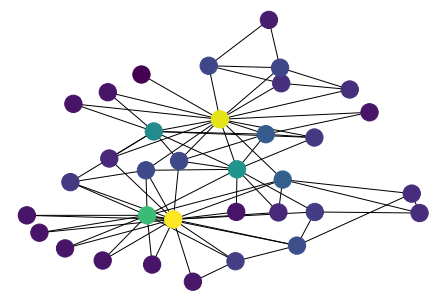

In [39]:
values = nx.pagerank(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

### Community Detection

#### Triangles

In [40]:
help(nx.triangles)

Help on function triangles in module networkx.algorithms.cluster:

triangles(G, nodes=None)
    Compute the number of triangles.
    
    Finds the number of triangles that include a node as one vertex.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    nodes : container of nodes, optional (default= all nodes in G)
       Compute triangles for nodes in this container.
    
    Returns
    -------
    out : dictionary
       Number of triangles keyed by node label.
    
    Examples
    --------
    >>> G=nx.complete_graph(5)
    >>> print(nx.triangles(G,0))
    6
    >>> print(nx.triangles(G))
    {0: 6, 1: 6, 2: 6, 3: 6, 4: 6}
    >>> print(list(nx.triangles(G,(0,1)).values()))
    [6, 6]
    
    Notes
    -----
    When computing triangles for the entire graph each triangle is counted
    three times, once at each node.  Self loops are ignored.



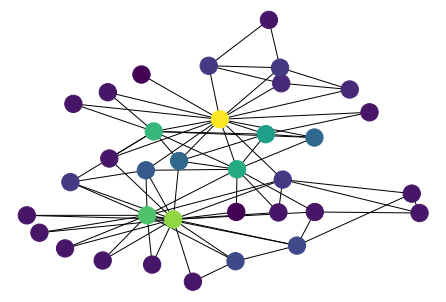

In [41]:
values = nx.triangles(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

#### Clustering coefficient

In [42]:
help(nx.clustering)

Help on function clustering in module networkx.algorithms.cluster:

clustering(G, nodes=None, weight=None)
    Compute the clustering coefficient for nodes.
    
    For unweighted graphs, the clustering of a node :math:`u`
    is the fraction of possible triangles through that node that exist,
    
    .. math::
    
      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
    
    where :math:`T(u)` is the number of triangles through node :math:`u` and
    :math:`deg(u)` is the degree of :math:`u`.
    
    For weighted graphs, there are several ways to define clustering [1]_.
    the one used here is defined
    as the geometric average of the subgraph edge weights [2]_,
    
    .. math::
    
       c_u = \frac{1}{deg(u)(deg(u)-1))}
             \sum_{vw} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.
    
    The edge weights :math:`\hat{w}_{uv}` are normalized by the maximum weight
    in the network :math:`\hat{w}_{uv} = w_{uv}/\max(w)`.
    
    The value of :math:`c_u` is assigned to 0 

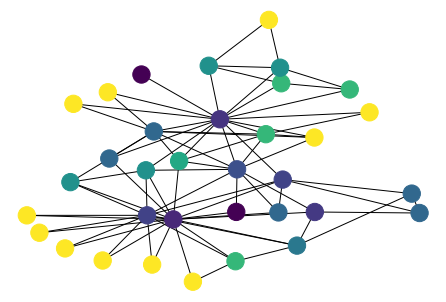

In [43]:
values = nx.clustering(G)
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

In [44]:
import matplotlib.colors as mcolors

In [45]:
colors = list(mcolors.BASE_COLORS.keys())

#### Label propagation

In [46]:
help(nx.community.label_propagation_communities)

Help on function label_propagation_communities in module networkx.algorithms.community.label_propagation:

label_propagation_communities(G)
    Generates community sets determined by label propagation
    
    Finds communities in `G` using a semi-synchronous label propagation
    method[1]_. This method combines the advantages of both the synchronous
    and asynchronous models. Not implemented for directed graphs.
    
    Parameters
    ----------
    G : graph
        An undirected NetworkX graph.
    
    Yields
    ------
    communities : generator
        Yields sets of the nodes in each community.
    
    Raises
    ------
    NetworkXNotImplemented
       If the graph is directed
    
    References
    ----------
    .. [1] Cordasco, G., & Gargano, L. (2010, December). Community detection
       via semi-synchronous label propagation algorithms. In Business
       Applications of Social Network Analysis (BASNA), 2010 IEEE International
       Workshop on (pp. 1-8). IEEE.



In [ ]:
parts = list(nx.community.label_propagation_communities(G))
values = {n: i for i, ns in enumerate(parts) for n in ns}
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

#### Clauset-Newman-Moore greedy modularity

Definition - Modularity is the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random.

In [ ]:
help(nx.community.greedy_modularity_communities)

In [ ]:
parts = list(nx.community.greedy_modularity_communities(G))
values = {n: i for i, ns in enumerate(parts) for n in ns}
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)

#### Louvain

This works well on large graphs, and is used to cluster single-cell RNA-seq data into cell subsets.

In [ ]:
import community as community_louvain

In [ ]:
help(community_louvain.best_partition)

In [ ]:
partion = community_louvain.best_partition(G)
values = {n: i for i, ns in enumerate(parts) for n in ns}
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw(G, pos, node_color=n_color)